In [939]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [940]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [941]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

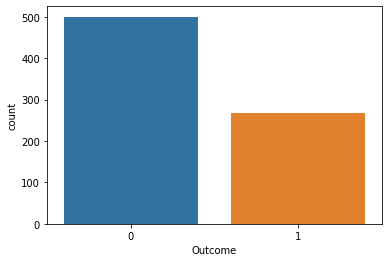

In [942]:
sns.countplot(x= 'Outcome', data= data)

<AxesSubplot:>

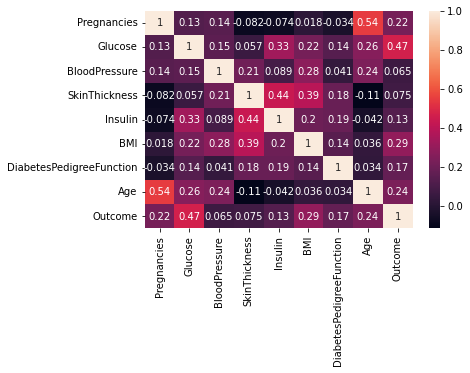

In [943]:
sns.heatmap(data.corr(), annot=True)


In [944]:
data = pd.read_csv('diabetes2.csv', usecols=['Glucose', 'BMI', 'Age', 'Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

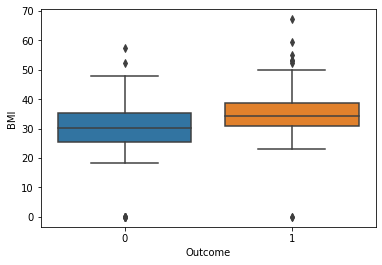

In [945]:
sns.boxplot(x="Outcome", y="BMI", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

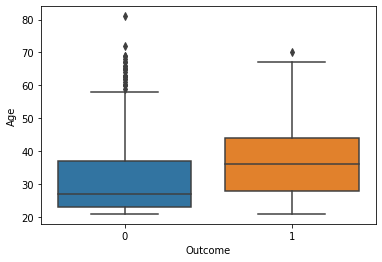

In [946]:
sns.boxplot(x="Outcome", y="Age", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

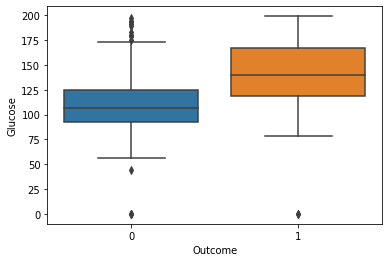

In [947]:
sns.boxplot(x="Outcome", y="Glucose", data=data)

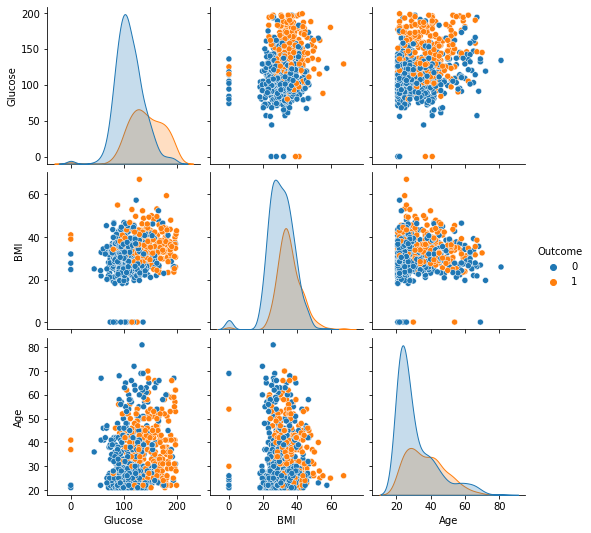

In [948]:
sns.pairplot(data, hue='Outcome')

In [949]:
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist() # histogram
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=plt)# prob plot
    plt.show()

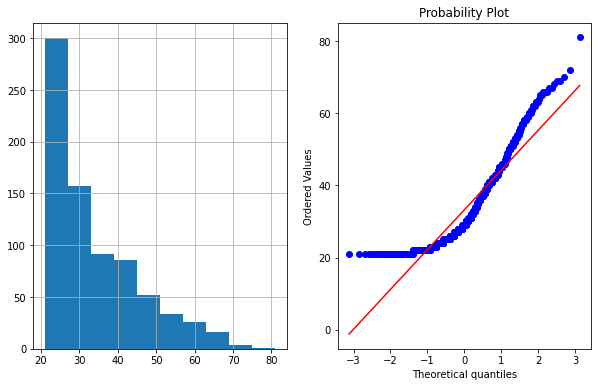

In [950]:
plot_data(data,'Age')

[-27.0, 92.0]


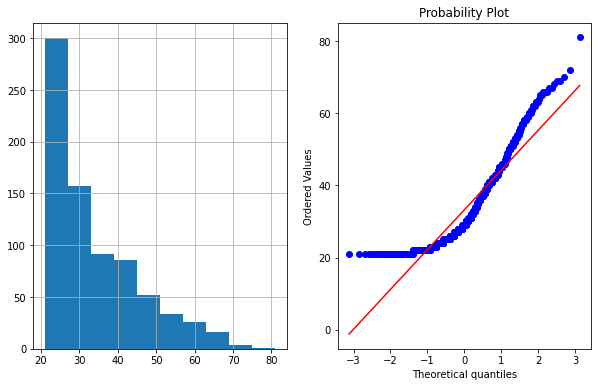

In [951]:
IQR = data["Age"].quantile(0.75) - data["Age"].quantile(0.25)
lower_age = data['Age'].quantile(0.25) - 3*IQR
upper_age = data['Age'].quantile(0.75) + 3*IQR
print([lower_age, upper_age])
data.loc[data['Age'] >= upper_age, 'Age'] = lower_age
plot_data(data,'Age')

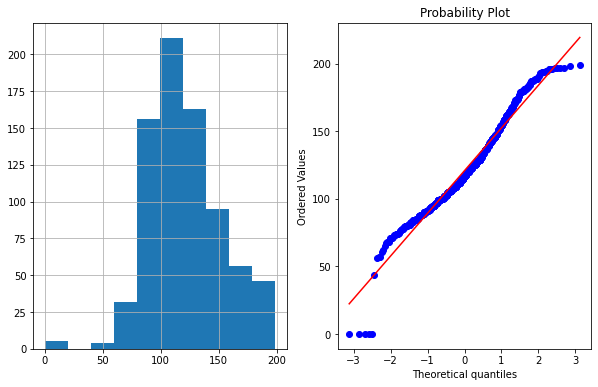

In [952]:
plot_data(data,'Glucose')

[24.976676664591338, 216.81238583540866]


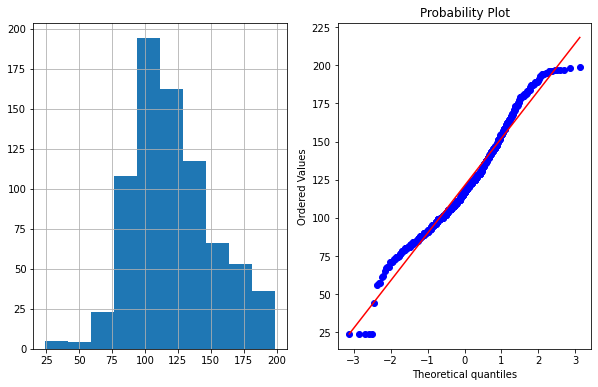

In [953]:
upper_Glucose = data['Glucose'].mean() + 3 * data['Glucose'].std()
lower_Glucose = data['Glucose'].mean() - 3 * data['Glucose'].std()
print([lower_Glucose, upper_Glucose])
data.loc[data['Glucose'] >= 216, 'Glucose'] = 216
data.loc[data['Glucose'] <= 24, 'Glucose'] = 24
plot_data(data,'Glucose')

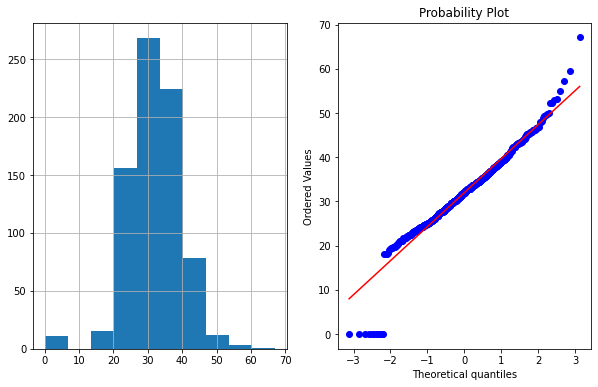

In [954]:
plot_data(data,'BMI')

[8.340097163873661, 55.64505908612634]


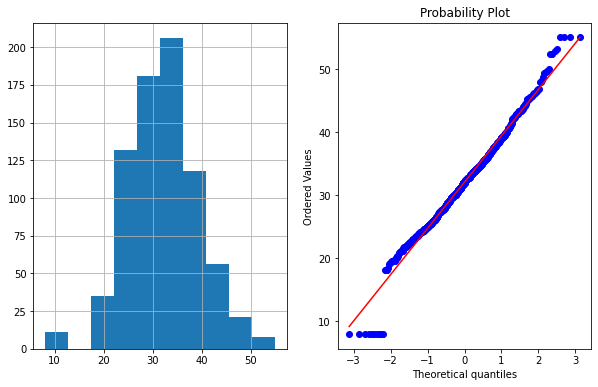

In [955]:
upper_BMI = data['BMI'].mean() + 3 * data['BMI'].std()
lower_BMI = data['BMI'].mean() - 3 * data['BMI'].std()
print([lower_BMI, upper_BMI])
data.loc[data['BMI'] >= 55, 'BMI'] = 55
data.loc[data['BMI'] <= 8, 'BMI'] = 8
plot_data(data,'BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

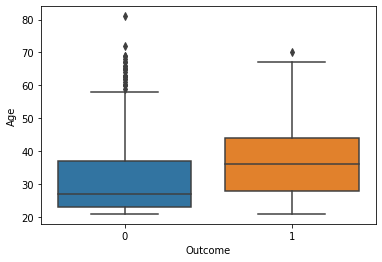

In [956]:
sns.boxplot(x="Outcome", y="Age", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

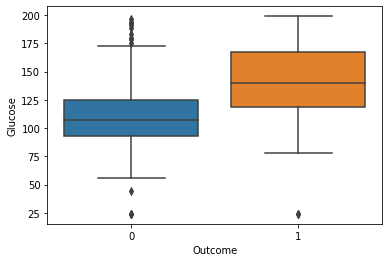

In [957]:
sns.boxplot(x="Outcome", y="Glucose", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

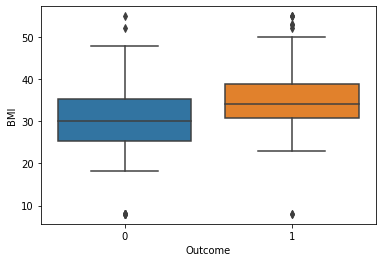

In [958]:
sns.boxplot(x="Outcome", y="BMI", data=data)

In [959]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def Logistic_Reg(data):
    acc_scores = []
    for i in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(
            data[['Age', 'Glucose', 'BMI']],
            data['Outcome'],test_size=0.3, 
            random_state=i)
        classifier = LogisticRegression()
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        acc_scores.append(accuracy_score(Y_test, Y_pred))
    return round(np.mean(acc_scores) * 100, 2)
print('accuracy_score:', Logistic_Reg(data), '%')

accuracy_score: 76.71 %


In [971]:
from sklearn.preprocessing import StandardScaler
min_max= StandardScaler()
data_minmax=pd.DataFrame(min_max.fit_transform(data.drop(columns=['Outcome'])),columns
=data.drop(columns=['Outcome']).columns)
data_minmax["Outcome"] = data['Outcome']

In [972]:
print('accuracy_score:', Logistic_Reg(data_minmax), '%')

accuracy_score: 76.71 %
